In [78]:
#Packages:
import pandas as pd
import numpy as np
import pyreadr as pyr
import sklearn as sk
import matplotlib.pyplot as plt
import scipy as sc
import os


In [79]:
os.chdir("C:/Users/ASUS/Documents/Universidad de los Andes/2022-2/Big Data and Machine Learning for Applied Economics/Taller 2/data") #Working directory. 
tr_p=pyr.read_r("train_personas.Rds") 
tr_h=pyr.read_r("train_hogares.Rds")
print(tr_p.keys())
print(tr_h.keys())
df_trp=tr_p[None] #Data frame (individuals). 
df_trh=tr_h[None] #Data frame (households). 

odict_keys([None])
odict_keys([None])


In [80]:
df=pd.merge(df_trp, df_trh, on="id") #Master data frame (merge by unique identificator key). 

In [81]:
#Missing values count/share. 
df.isnull().sum() 
df.isnull().sum()/len(df) 

id             0.0
Orden          0.0
Clase_x        0.0
Dominio_x      0.0
Estrato1       0.0
              ... 
Npobres        0.0
Nindigentes    0.0
Fex_c_y        0.0
Depto_y        0.0
Fex_dpto_y     0.0
Length: 157, dtype: float64

In [82]:
#Convert categorical variables to dummy variables:
estrato1_d=pd.get_dummies(df["Estrato1"], prefix="estrato") 
maxeduc_d=pd.get_dummies(df["P6210"], prefix="educ") 

#Merge dummy's variables data frame with master data frame:
df=pd.merge(df, estrato1_d, left_index=True, right_index=True)
df=pd.merge(df, maxeduc_d, left_index=True, right_index=True)

In [83]:
#Descriptive statistics data frame:
df["Ingtotugarr"]=df_trh["Ingtotugarr"]/df_trh["Nper"] #Mean of household income. 
ds=(df[["Ingtotugarr", "Ingtot", "P6040", "Nper", "Pobre", "P6020", "estrato_1.0", "estrato_2.0", "estrato_3.0", 
"estrato_4.0", "estrato_5.0", "estrato_6.0", "educ_1.0", "educ_2.0", "educ_3.0", "educ_4.0", "educ_5.0", "educ_6.0"]].describe(include="all"))
ds=ds.T
ds=ds[["count", "mean", "std", "min", "50%", "max"]]
ds=ds.round(2)
print(ds.to_latex())

\begin{tabular}{lrrrrrr}
\toprule
{} &     count &       mean &         std &  min &        50\% &          max \\
\midrule
Ingtotugarr &  164960.0 &  864194.36 &  1225467.34 &  0.0 &  541666.67 &  88833333.33 \\
Ingtot      &  447512.0 &  775591.56 &  1380447.03 &  0.0 &  430000.00 &  85833333.33 \\
P6040       &  542941.0 &      33.55 &       21.64 &  0.0 &      31.00 &       110.00 \\
Nper        &  542941.0 &       4.25 &        2.07 &  1.0 &       4.00 &        22.00 \\
Pobre       &  542941.0 &       0.25 &        0.43 &  0.0 &       0.00 &         1.00 \\
P6020       &  542941.0 &       1.53 &        0.50 &  1.0 &       2.00 &         2.00 \\
estrato\_1.0 &  542941.0 &       0.22 &        0.41 &  0.0 &       0.00 &         1.00 \\
estrato\_2.0 &  542941.0 &       0.26 &        0.44 &  0.0 &       0.00 &         1.00 \\
estrato\_3.0 &  542941.0 &       0.22 &        0.42 &  0.0 &       0.00 &         1.00 \\
estrato\_4.0 &  542941.0 &       0.11 &        0.32 &  0.0 &       0.00 

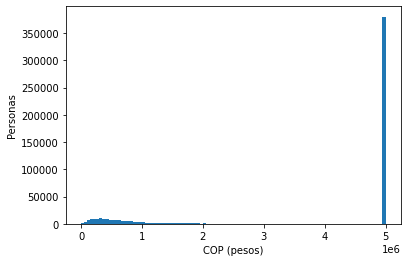

In [87]:
#Winsorize data:
yth=df["Ingtotugarr"]
yth=sc.stats.mstats.winsorize(yth, limits=[0, 0.05], inplace=True)

#Histogram of total household income:
plt.hist(yth, bins=100)
plt.ylabel("Personas")
plt.xlabel("COP (pesos)")
plt.savefig("histy.jpg", bbox_inches="tight")
plt.show()

In [53]:
yth.describe()

count    5.429410e+05
mean     2.296200e+06
std      1.731159e+06
min      0.000000e+00
25%      1.010000e+06
50%      1.796407e+06
75%      3.040000e+06
max      6.838333e+06
Name: Ingtotugarr, dtype: float64